# Experimentacion

## Experimento 1 - Comparación entre golosos

In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [2]:
import tqdm
import pcmi
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

In [3]:
def extract_instance_size(df: pd.DataFrame) -> pd.DataFrame:
    """Agrega al dataframe una columna con el tamaño de las instancias."""
    # https://stackoverflow.com/questions/23586510/return-multiple-columns-from-pandas-apply
    df = df.copy()
    def attrs(s):
        # CMI_n10.in
        s["n"] = int(s["Instancia"].split('.')[0].split('_n')[1])
        return s

    df = df.apply(attrs, axis=1)
    return df

In [4]:
mypath    = "../instancias"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
inFiles   = [file for file in onlyfiles if file.split(".")[1] == "in"]
outFiles  = [file for file in onlyfiles if file.split(".")[1] == "out"]

In [5]:
golosos    = ["S-LF", "W", "WP", "C"]
tabusearch = ["TSS-E", "TSS-C", "TSC-E", "TSC-C"]
algoritmos = golosos + tabusearch

In [6]:
columnas = ["Instancia", "Inicial", "Tabu", "Time", "Impacto", "Optimo", "Algoritmo", "PorcentajeV"]
dfTabu   = pd.DataFrame(columns = columnas)
dfTabu   = dfTabu.astype({"Impacto":"int32", "Optimo":"int32", "PorcentajeV": "int32"})

for porcentaje in tqdm.tqdm(range(25, 125, 25)):
    for tabu in tabusearch:
        for inicial in golosos:
            for file in inFiles:
                    instancia = f"../instancias/{file}"
                    salida    = f"../instancias/{file[:-3]}.out"
                    
                    solucion, tiempo, optimo = pcmi.run(tabu, instancia, salida, inicial, 1000, 100, porcentaje)
                    impacto, coloreo = solucion

                    entry  = {'Instancia': file, 'Inicial': inicial, 'Tabu': tabu, 'Time': tiempo*1000, 
                            'Impacto': int(impacto), 'Optimo': int(optimo), 'Algoritmo': f"{tabu}-{inicial}", 'PorcentajeV': porcentaje}
                    dfTabu = dfTabu.append(entry, ignore_index=True)

dfTabu["Gap"] = (dfTabu["Optimo"] - dfTabu["Impacto"])/dfTabu["Optimo"]

  0%|          | 0/4 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [64]:
dfTabu2 = dfTabu.groupby(["Tabu", "Inicial", "Instancia"]).mean().reset_index()
dfTabu2 = extract_instance_size(dfTabu2)
dfTabu2.sort_values(by=['Instancia']).head()

,Tabu,Inicial,Instancia,Time,Impacto,Optimo,PorcentajeV,Gap,n
0,TSC-C,C,CMI_n10.in,317.56325,3.0,3.0,62.5,0.000000,10
65,TSC-E,S-LF,CMI_n10.in,9.68525,3.0,3.0,62.5,0.000000,10
117,TSS-C,S-LF,CMI_n10.in,32.74175,3.0,3.0,62.5,0.000000,10
52,TSC-E,C,CMI_n10.in,198.79625,3.0,3.0,62.5,0.000000,10
130,TSS-C,W,CMI_n10.in,24048.27500,2.0,3.0,62.5,0.333333,10


In [11]:
columnas = ["Instancia", "Algoritmo", "Time", "Impacto", "Optimo"]
dfGoloso = pd.DataFrame(columns = columnas)
dfGoloso = dfGoloso.astype({"Impacto":"int32", "Optimo":"int32"})

for repeat in range(10):
    for algoritmo in golosos:
        for file in inFiles:
            instancia = f"../instancias/{file}"
            salida    = f"../instancias/{file[:-3]}.out"
            solucion, tiempo, optimo = pcmi.run(algoritmo, instancia, salida)
            impacto, coloreo = solucion

            entry    = {'Instancia': file, 'Algoritmo': algoritmo, 'Time': tiempo*1000, 'Impacto': int(impacto), 'Optimo': int(optimo)}
            dfGoloso = dfGoloso.append(entry, ignore_index=True)
            
dfGoloso["Gap"] = (dfGoloso["Optimo"] - dfGoloso["Impacto"])/dfGoloso["Optimo"]

In [13]:
dfGoloso.sort_values(by=['Instancia'])
dfGoloso = extract_instance_size(dfGoloso)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'CMI_n6.in'),
  Text(1, 0, 'CMI_n8.in'),
  Text(2, 0, 'CMI_n10.in'),
  Text(3, 0, 'CMI_n12.in'),
  Text(4, 0, 'CMI_n14.in'),
  Text(5, 0, 'CMI_n16.in'),
  Text(6, 0, 'CMI_n18.in'),
  Text(7, 0, 'CMI_n20.in'),
  Text(8, 0, 'CMI_n22.in'),
  Text(9, 0, 'CMI_n24.in'),
  Text(10, 0, 'CMI_n26.in'),
  Text(11, 0, 'CMI_n28.in'),
  Text(12, 0, 'CMI_n30.in')])

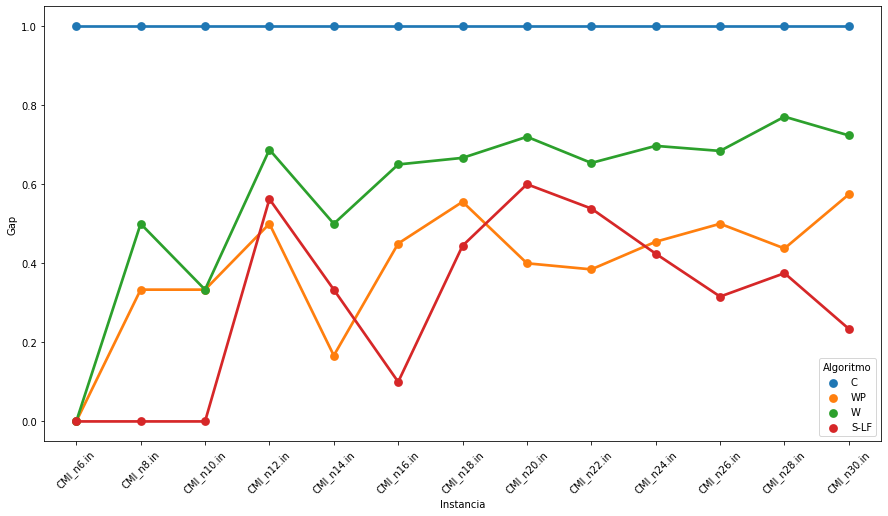

In [14]:
plt.figure(figsize=(15,8))
g = sns.pointplot(data=dfGoloso.sort_values(by=['n']), x="Instancia", y="Gap", hue="Algoritmo")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

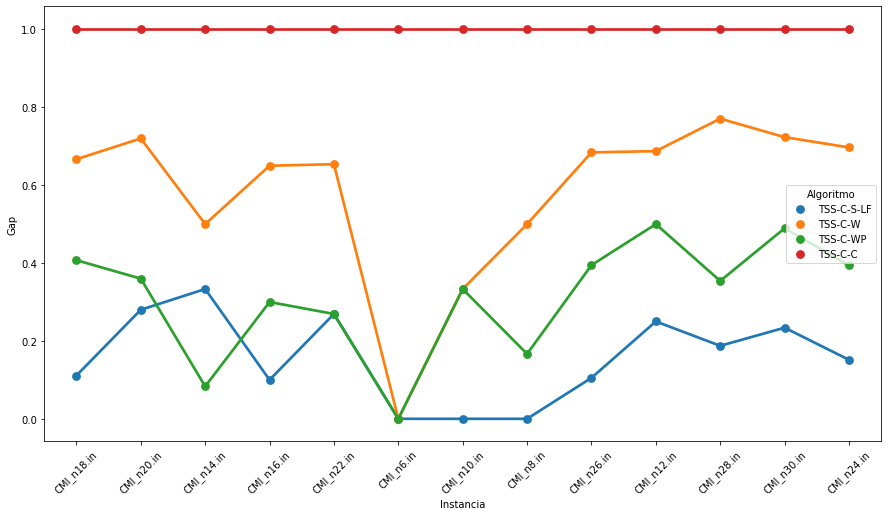

In [33]:
plt.figure(figsize=(15,8))
g = sns.pointplot(data=dfTabu[(dfTabu["Tabu"]=="TSS-C") & (dfTabu["PorcentajeV"] == 10)], x="Instancia", y="Gap", hue="Algoritmo")
plt.xticks(rotation=45)

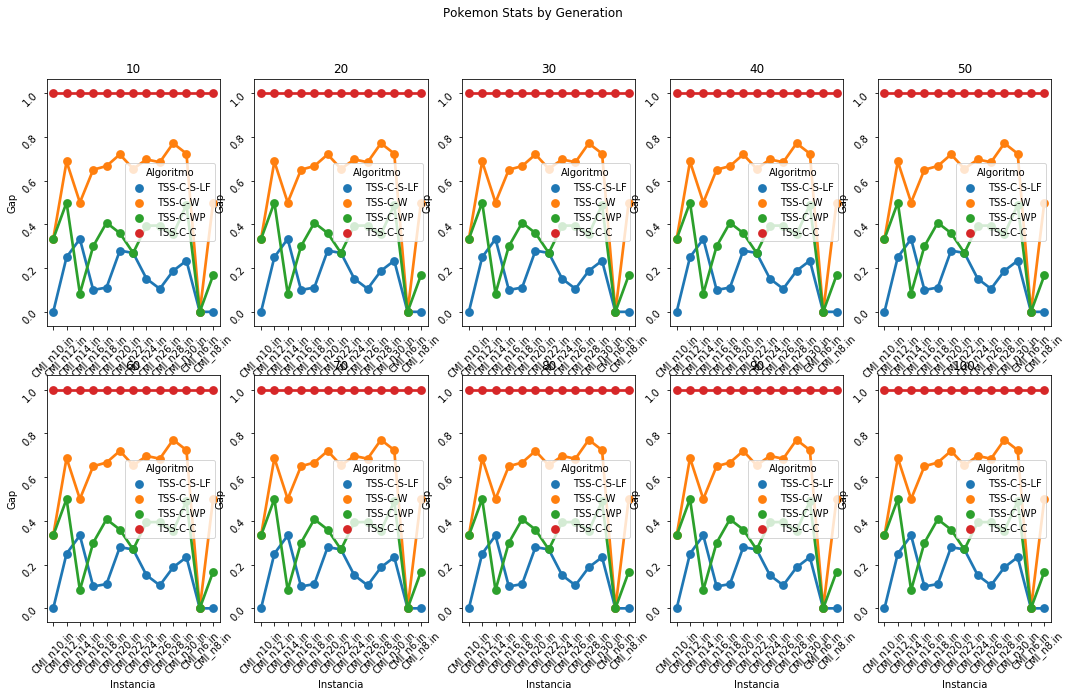

In [47]:
# plt.figure(figsize=(15,8))
fig, axes = plt.subplots(2, 5, figsize=(18, 10))

fig.suptitle('Pokemon Stats by Generation')
for i in range (1, 11):
    g = sns.pointplot(ax=axes[math.floor((i-1)/5), (i-1)%5], data=dfTabu[(dfTabu["Tabu"]=="TSS-C") & (dfTabu["PorcentajeV"] == i*10)].sort_values(by=['Instancia']), x="Instancia", y="Gap", hue="Algoritmo")
    axes[math.floor((i-1)/5), (i-1)%5].set_title(i*10)
    axes[math.floor((i-1)/5), (i-1)%5].tick_params(labelrotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

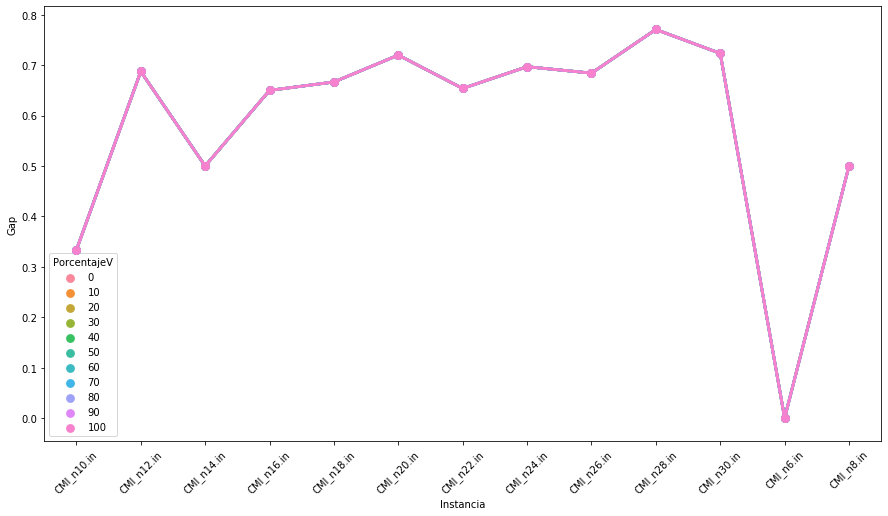

In [49]:
plt.figure(figsize=(15,8))
g = sns.pointplot(data=dfTabu[dfTabu["Algoritmo"]=="TSS-C-W"].sort_values(by=['Instancia']), x="Instancia", y="Gap", hue="PorcentajeV")
plt.xticks(rotation=45)

# Conclusiones: no hay conclusiones

## Optimizacion meta-parametros tabu search

In [47]:
def run_tabu(
        df: pd.DataFrame,
        file: str,
        algorithm: str,
        initialAlgorithm: str,
        it: int,
        mem_size: int,
        percent: int,
        aspirar: bool,
    ) -> pd.DataFrame:

    instancia = f"../instancias/{file}"
    salida    = f"../instancias/{file[:-3]}.out"

    solucion, tiempo, optimo = pcmi.run(
        algorithm,
        instancia,
        salida,
        initialAlgorithm,
        it,
        mem_size,
        percent,
        aspirar,
    )

    impacto, coloreo = solucion

    entry  = {
        "Instancia": file,
        "Inicial": initialAlgorithm,
        "Iteraciones": it,
        "CantMemoria": mem_size,
        "PorcentajeVecindad": percent,
        "Aspirar": aspirar,
        "Tabu": algorithm,
        "Algoritmo": f"{algorithm}-{initialAlgorithm}",
        "Time": tiempo*1000, 
        "Impacto": impacto,
        "Optimo": optimo,
        "N": int(file.split('.')[0].split('_n')[1]),
        "Gap": (optimo - impacto) / optimo,
    }

    return df.append(entry, ignore_index=True)

dfTabu = pd.DataFrame(columns = [
    "Instancia",
    "Inicial",
    "Iteraciones",
    "CantMemoria",
    "PorcentajeVecindad",
    "Aspirar",
    "Tabu",
    "Algoritmo",
    "Time",
    "Impacto",
    "Optimo",
])

PORCENTAJES = range(20, 105, 5)
MEMORIA = range(5, 105, 5)
ITERACIONES = range(10, 110, 10)
ASPIRAR = [True, False]
trainFiles = list(filter(lambda f: int(f.split('.')[0].split('n')[1]) % 4 != 0, inFiles))

for tabu in tqdm.tqdm(tabusearch):
    for inicial in golosos:
        for file in trainFiles:
            for percent in PORCENTAJES:
                #file = "CMI_n30.in"
                #inicial = "W"
                it = 100
                memoria = 10
                #percent = 100
                aspirar = False
                dfTabu = run_tabu(dfTabu, file, tabu, inicial, it, memoria, percent, aspirar)


print("Done!")

100%|██████████| 4/4 [03:50<00:00, 57.70s/it]

Done!


In [48]:
dfTabu["PorcentajeVecindad"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], dtype=object)

<AxesSubplot:xlabel='PorcentajeVecindad', ylabel='Gap'>

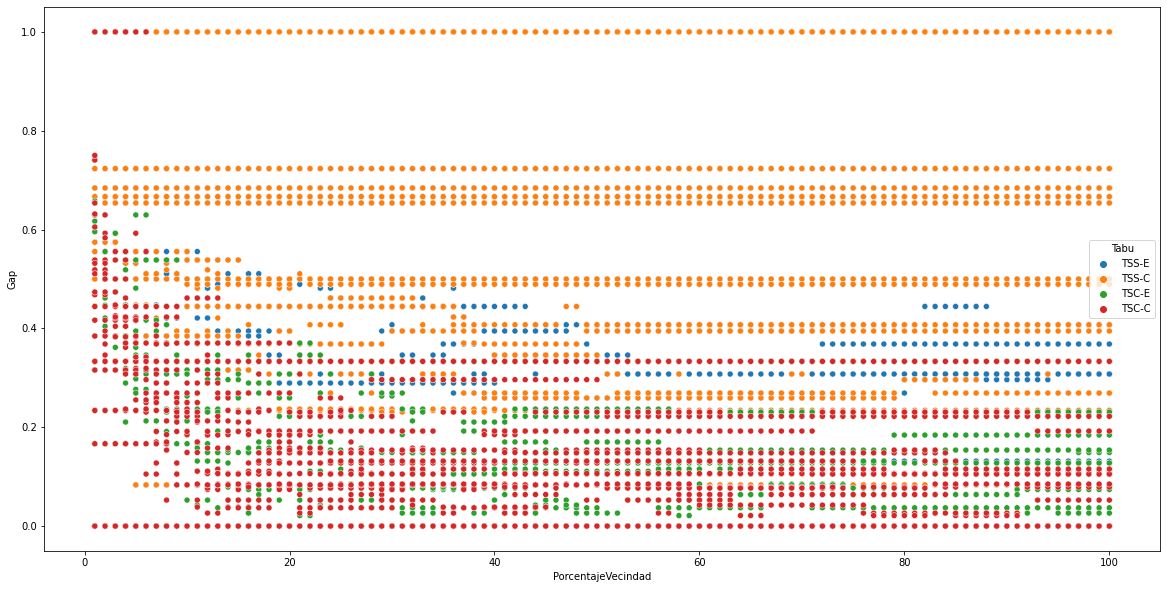

In [53]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=dfTabu, x="PorcentajeVecindad", y="Gap", hue="Tabu")

<AxesSubplot:xlabel='PorcentajeVecindad', ylabel='Gap'>

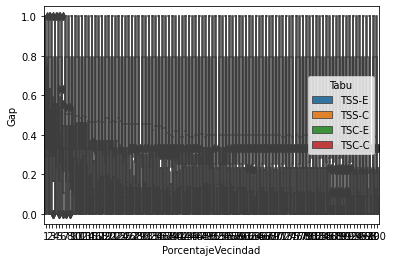

In [54]:
sns.boxplot(data=dfTabu, x="PorcentajeVecindad", y="Gap", hue="Tabu")